# Init

In [1]:
import numpy as np
from numpy.linalg import inv, norm, eig
from math import atan, sin, cos
import matplotlib.pyplot as plt
import random
import networkx as nx
import warnings

# Main

In [2]:
warnings.filterwarnings('ignore')

In [3]:
class web_graph_generator:
    def __init__(self):
        pass

    def generate_web_graph(self, size=5, show=False):
        matrix = np.zeros(shape=(size, size))
        
        for i in range(size):
            for j in range(size):
                matrix[i][j] = 1 if random.randint(0, 99) < 20 else 0
                if i == j:
                    matrix[i][j] = 0                    
        matrix = self.additional_edges(matrix)
        if show :
            print(matrix)
        return matrix

    def additional_edges(self, matrix):
        len_ = len(matrix)
        for i, row in enumerate(matrix):
            if sum(row) == 0:
                j = random.randint(0, len_ - 1)
                matrix[i][j if i != j else j+1 if i == 0 else j - 1] = 1

        for column in range(len_):
            if sum(matrix[:, column]) == 0:
                i = random.randint(0, len(matrix) - 1)
                matrix[i if i != column else i+1 if column == 0 else i - 1][column] = 1
                  
        return matrix
    
    def draw_classic(self, matrix):
        web_graph = nx.DiGraph(matrix)
        nx.draw(web_graph, with_labels=True)

        return 
    
    def draw_size_dependent(self, matrix):
        web_graph = nx.DiGraph(matrix)
        # print(nx.degree(web_graph))
        weights = [v*200 for c, v in nx.degree(web_graph)]
        all_weights = sum(weights)
        colors = [weights[i]/all_weights for i in range(len(weights))]
        nx.draw(web_graph, node_size=weights, with_labels=True, node_color = colors)
        
        return
    
    def generate_matrix_A(self, matrix):
        len_ = len(matrix)
        A = np.zeros(shape=(len_, len_))
        for i in range(len_):
            from_vertex =sum(matrix[i])
            for j in range(len_):
                A[i][j] = matrix[i][j] / from_vertex 
        
        return A                                   

In [25]:
class solver:
    def __init__(self):
        return
    def pagerank(self, matrix, alpha=0.85, accuracy=10**(-9)):
        # B = alpha * A + (1 - alpha) * M where M = (m_ij), mij = 1/n
        A = matrix.copy().T
        n = A.shape[0]
        for i in range(n):
            col = A[:, i]
            A[:, i] = col/np.count_nonzero (col)
        M = np.ones(A.shape) / n
        B = alpha * A + (1 - alpha) * M
        X_prev = np.zeros((n, 1))
        X_k = np.ones((n, 1)) / n

        while np.linalg.norm(X_k - X_prev) > accuracy:
            X_prev = X_k
            X_k = np.dot(B, X_k)

        result = X_k.reshape((1, -1))
        
        return result[0]

    @staticmethod
    def generate_random_matrix(size, min_value=0, max_value=100):
        matrix = np.random.randint(min_value, high=max_value + 1, size=(size, size))
        return matrix

    def generate_matrix_from_eigen(self, values, matrix):
        matrix = matrix.copy().T
        if (len(values) != matrix.shape[0]):
            return
        M = np.diag(np.array(values))
        S_inv = np.linalg.inv(matrix)
        return matrix @ M @ S_inv

    def generate_symmetric_matrix(self, size, min_value=0, max_value=10):
        a = np.random.randint(min_value, max_value, (size,size))
        result = np.tril(a) + np.tril(a, -1).T
        return result
    
    def stop_moment(self, matrix):
        x = [matrix[i, j] ** 2 for j in range(matrix.shape[0]) for i in range(matrix.shape[0]) if i != j]
        #print(x)
        return sum(x)

    def max_non_diagonal(self, matrix):
        n = len(matrix)
        aMax = 0.0
        for i in range(n-1):
            for j in range(i+1,n):
                if abs(matrix[i,j]) > aMax:
                    aMax = abs(matrix[i,j])
                    k = i; l = j
        return k,l
    
    def jacobi(self, matrix, eps=1e-4):
        it = 0
        a = matrix.copy()
        u_al = np.eye(a.shape[0])

        while self.stop_moment(a) >= eps:
            
            it += 1
            u = np.eye(a.shape[0])

            i, j = self.max_non_diagonal(a)

            phi = atan(2 * a[i, j] / (a[i,i] - a[j,j])) / 2
            u[i, [i, j]],u[j, [i, j]] = [cos(phi), - sin(phi)], [sin(phi), cos(phi)]
            
            u_al = u_al @ u
            a = u.T @ a @ u
            
            #print(f'\n Iteration {it}:  \n'
            #   f'\tt(matrix) = {stop_moment(a)}.\n')

        
        return np.diag(a), u_al

    def check_symmetric(self, a, rtol=1e-05, atol=1e-08):
        return np.allclose(a, a.T, rtol=rtol, atol=atol)

# Testing

In [5]:
gen = web_graph_generator()

In [26]:
solver = solver()

## PageRank

In [7]:
matrix = gen.generate_web_graph(15)
matrix

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0.

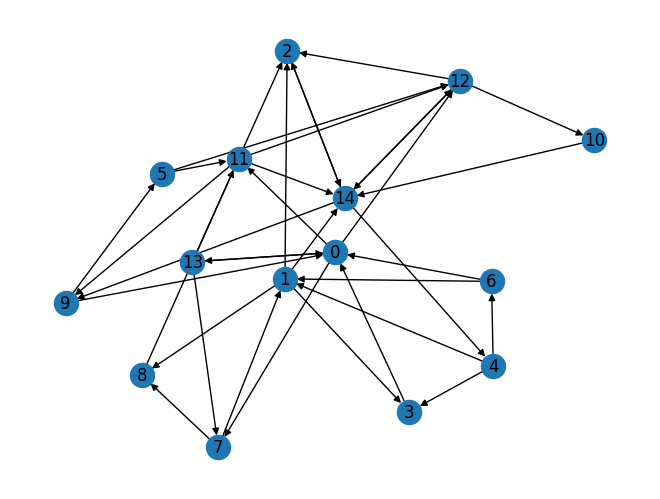

In [8]:
gen.draw_classic(matrix)

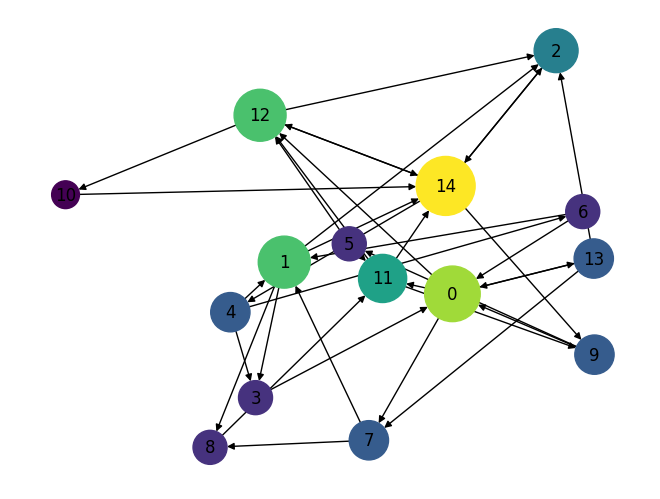

In [9]:
gen.draw_size_dependent(matrix)

In [10]:
matrix_A = gen.generate_matrix_A(matrix)
matrix_A

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.25      , 0.        , 0.        ,
        0.        , 0.25      , 0.25      , 0.25      , 0.        ],
       [0.        , 0.        , 0.25      , 0.25      , 0.        ,
        0.        , 0.        , 0.        , 0.25      , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.25      ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.        ,
        0.        , 0.33333333, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

In [11]:
print(*solver.pagerank(matrix))

0.0902795981961031 0.051040593993590275 0.10213986499516094 0.035493794863628116 0.05169765397201606 0.041365695927996764 0.024647668670080555 0.03745333205396582 0.03676379235719156 0.07380163737792848 0.04132716733761953 0.07801405875061027 0.11056647263364029 0.029184414561988028 0.1962242543084809


In [12]:
print(*[prob for prob in nx.pagerank(nx.DiGraph(matrix)).values()])

0.09027948397547284 0.051040671540647516 0.1021399680347981 0.03549382162858768 0.05169749411460469 0.04136580639444055 0.02464781009665746 0.03745327056874291 0.03676378047080568 0.07380186889578033 0.04132744159110527 0.07801378461398059 0.11056633330886725 0.029184249771584986 0.19622421499392415


## Jacobi eigenvalue algorithm

In [13]:
test_matr = np.matrix([[2, -1, 0, 0],[-1, 2, -1, 0],[0, -1, 2, -1],[0,0, -1, 2]])
print(test_matr)

module_result = np.linalg.eig(test_matr)
print("np.linalg.eig:\n", *module_result[0])
print("np.linalg.eig EigenVectors:\n", module_result[1])

jacobi_result = solver.jacobi(test_matr)
print("Jacobi:\n", *jacobi_result[0])
print("Jacobi Eigenvectors:\n", jacobi_result[1])

[[ 2 -1  0  0]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [ 0  0 -1  2]]
np.linalg.eig:
 3.6180339887498913 2.618033988749896 0.3819660112501053 1.3819660112501053
np.linalg.eig EigenVectors:
 [[-0.37174803 -0.60150096 -0.37174803 -0.60150096]
 [ 0.60150096  0.37174803 -0.60150096 -0.37174803]
 [-0.60150096  0.37174803 -0.60150096  0.37174803]
 [ 0.37174803 -0.60150096 -0.37174803  0.60150096]]
Jacobi:
 3.6180339887498953 1.381966011250105 2.618033988749895 0.38196601125010515
Jacobi Eigenvectors:
 [[ 0.37174803  0.60150096 -0.60150096  0.37174803]
 [-0.60150096  0.37174803  0.37174803  0.60150096]
 [ 0.60150096 -0.37174803  0.37174803  0.60150096]
 [-0.37174803 -0.60150096 -0.60150096  0.37174803]]


In [14]:
symetric = solver.generate_symmetric_matrix(size=5)
print(symetric)

module_result = np.linalg.eig(symetric)
print("np.linalg.eig:\n", *module_result[0])
print("np.linalg.eig EigenVectors:\n", module_result[1])
jacobi_result = solver.jacobi(symetric)
print("Jacobi:\n", *jacobi_result[0])
print("Jacobi Eigenvectors:\n", jacobi_result[1])


[[8 0 6 8 8]
 [0 0 6 6 7]
 [6 6 5 7 9]
 [8 6 7 7 1]
 [8 7 9 1 1]]
np.linalg.eig:
 28.181037983151896 -11.092034548745843 -4.349113626929722 4.749073765332285 3.511036427191371
np.linalg.eig EigenVectors:
 [[-0.50146325 -0.36682668  0.17142492  0.62351309  0.44251296]
 [-0.3112994  -0.50513917  0.56251166 -0.5016574  -0.28257317]
 [-0.5121379  -0.20365631 -0.75866255 -0.34589129  0.03208158]
 [-0.46640605  0.37227089  0.02510262  0.34936886 -0.72193562]
 [-0.41449664  0.6559048   0.27927607 -0.34332477  0.44957137]]
Jacobi:
 4.7490739164892135 -4.349113626976066 28.18103770145749 3.5110364503968836 -11.09203444136753
Jacobi Eigenvectors:
 [[ 0.62360525  0.17142395  0.50138428 -0.44251512 -0.36677581]
 [-0.50158899  0.56251033  0.31136071  0.28255326 -0.50518192]
 [-0.34582001 -0.75866309  0.51217328 -0.03210432 -0.20368279]
 [ 0.34937216  0.0251036   0.4663912   0.72192878  0.3722996 ]
 [-0.34332578  0.27927778  0.41451911 -0.44959112  0.65587579]]


## N-eigenvalue + N-eigenvectors

In [15]:
test_matrix = solver.generate_matrix_from_eigen([1,3,1,1,1], solver.generate_random_matrix(5))
test_matrix

array([[ 4.23107772e+00, -1.05042831e+00, -4.70598647e+00,
         3.24911824e-01, -9.08379962e-02],
       [ 2.74882731e+00,  1.06352037e-01, -4.00360043e+00,
         2.76417522e-01, -7.72800863e-02],
       [ 1.92900162e-01, -6.27121378e-02,  7.19045584e-01,
         1.93977208e-02, -5.42316395e-03],
       [ 5.30475446e-01, -1.72458379e-01, -7.72624644e-01,
         1.05334373e+00, -1.49137009e-02],
       [ 3.90622828e+00, -1.26992079e+00, -5.68932692e+00,
         3.92803847e-01,  8.90180930e-01]])

In [28]:
cnt = 0
for i in range(10000):
    try: 
        test = solver.generate_matrix_from_eigen(np.random.randint(10, size=3), solver.generate_random_matrix(3))
        if solver.check_symmetric(test) :
            cnt += 1
            # print(solver.jacobi(test))
    except:
        continue

print(cnt)

86
